# Day 09. Exercise 00
# Regularization

## 0. Imports

In [13]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import accuracy_score, classification_report

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix

import seaborn as sns

import joblib

## 1. Preprocessing

1. Read the file `dayofweek.csv` that you used in the previous day to a dataframe.
2. Using `train_test_split` with parameters `test_size=0.2`, `random_state=21` get `X_train`, `y_train`, `X_test`, `y_test`. Use the additional parameter `stratify`.

In [14]:
data = pd.read_csv('../data/dayofweek.csv', index_col=0)

In [15]:
data

,numTrials,hour,dayofweek,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,-0.788667,-2.562352,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,-0.756764,-2.562352,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,-0.724861,-2.562352,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,-0.692958,-2.562352,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,-0.661055,-2.562352,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,-0.533442,0.945382,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1682,-0.629151,0.945382,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1683,-0.597248,0.945382,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1684,-0.565345,0.945382,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [16]:
x = data.drop('dayofweek', axis=1)
y = data['dayofweek']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=45, test_size=0.2, stratify=y)

## 2. Logreg regularization

### a. Default regularization

1. Train a baseline model with the only parameters `random_state=21`, `fit_intercept=False`.
2. Use stratified K-fold cross-validation with `10` splits to evaluate the accuracy of the model


The result of the code where you trained and evaluated the baseline model should be exactly like this (use `%%time` to get the info about how long it took to run the cell):

```
train -  0.62902   |   valid -  0.59259
train -  0.64633   |   valid -  0.62963
train -  0.63479   |   valid -  0.56296
train -  0.65622   |   valid -  0.61481
train -  0.63397   |   valid -  0.57778
train -  0.64056   |   valid -  0.59259
train -  0.64138   |   valid -  0.65926
train -  0.65952   |   valid -  0.56296
train -  0.64333   |   valid -  0.59701
train -  0.63674   |   valid -  0.62687
Average accuracy on crossval is 0.60165
Std is 0.02943
```

In [18]:
lr = LogisticRegression(random_state=45, fit_intercept=False)

In [19]:
def crossval(model, X, y, n_splits=10):
    train_scores = []
    valid_scores = []

    skf = StratifiedKFold(n_splits=10)

    for train, valid in skf.split(X, y):
        X_train, X_valid = X.iloc[train], X.iloc[valid]
        
        y_train, y_valid = y.iloc[train], y.iloc[valid]
        
        model.fit(X_train, y_train)
        
        y_train_pred = model.predict(X_train)
        
        y_valid_pred = model.predict(X_valid)
        
        train_scores.append(accuracy_score(y_train, y_train_pred))
        
        valid_scores.append(accuracy_score(y_valid, y_valid_pred))

    for i in range(len(train_scores)):
        print(f'train - {train_scores[i]:.5f} | valid - {valid_scores[i]:.5f}')
        
    print(f'Average accuracy on crossval is {np.mean(valid_scores):.5f}')
    print(f'Std is {np.std(valid_scores):.5f}')

In [20]:
%%time
crossval(lr, X_train, y_train)

train - 0.63809 | valid - 0.54074
train - 0.63891 | valid - 0.60741
train - 0.61500 | valid - 0.66667
train - 0.62242 | valid - 0.60000
train - 0.63314 | valid - 0.66667
train - 0.63149 | valid - 0.54074
train - 0.64221 | valid - 0.60741
train - 0.63397 | valid - 0.51852
train - 0.62603 | valid - 0.67164
train - 0.62932 | valid - 0.61194
Average accuracy on crossval is 0.60317
Std is 0.05276
CPU times: user 6.18 s, sys: 19.9 ms, total: 6.2 s
Wall time: 920 ms


### b. Optimizing regularization parameters

1. In the cells below try different values of penalty: `none`, `l1`, `l2` – you can change the values of solver too.

In [ ]:
%time
lr = LogisticRegression(
    penalty=None,
    max_iter=1000,
    random_state=21,
    fit_intercept=False
)
crossval(lr, X_train, y_train)

CPU times: user 14 μs, sys: 1e+03 ns, total: 15 μs
Wall time: 136 μs
train - 0.68178 | valid - 0.57037
train - 0.67189 | valid - 0.61481
train - 0.66777 | valid - 0.65926
train - 0.68261 | valid - 0.65185
train - 0.66117 | valid - 0.69630
train - 0.66777 | valid - 0.55556
train - 0.68838 | valid - 0.62222
train - 0.66694 | valid - 0.59259
train - 0.65321 | valid - 0.67910
train - 0.66722 | valid - 0.61940
Average accuracy on crossval is 0.62615
Std is 0.04346


In [24]:
%%time
lr = LogisticRegression(random_state=21, 
                        fit_intercept=False, 
                        solver='liblinear', 
                        penalty='l1')
crossval(lr, X_train, y_train)

/home/just05me/pandas/PandasVenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
/home/just05me/pandas/PandasVenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
/home/just05me/pandas/PandasVenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised i

train - 0.62655 | valid - 0.54815
train - 0.61830 | valid - 0.61481
train - 0.59934 | valid - 0.64444
train - 0.60841 | valid - 0.57037
train - 0.61253 | valid - 0.64444
train - 0.61418 | valid - 0.52593
train - 0.62572 | valid - 0.60741
train - 0.61418 | valid - 0.52593
train - 0.60297 | valid - 0.63433
train - 0.61120 | valid - 0.57463
Average accuracy on crossval is 0.58904
Std is 0.04403
CPU times: user 386 ms, sys: 7.59 ms, total: 393 ms
Wall time: 411 ms


/home/just05me/pandas/PandasVenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
/home/just05me/pandas/PandasVenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
/home/just05me/pandas/PandasVenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised i

In [25]:
%%time
lr = LogisticRegression(random_state=21, 
                        fit_intercept=False, 
                        solver='liblinear', 
                        penalty='l2')
crossval(lr, X_train, y_train)

/home/just05me/pandas/PandasVenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
/home/just05me/pandas/PandasVenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
/home/just05me/pandas/PandasVenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised i

train - 0.61665 | valid - 0.54815
train - 0.61500 | valid - 0.60741
train - 0.59604 | valid - 0.64444
train - 0.60923 | valid - 0.56296
train - 0.61418 | valid - 0.64444
train - 0.60841 | valid - 0.54074
train - 0.62325 | valid - 0.57778
train - 0.60429 | valid - 0.49630
train - 0.60544 | valid - 0.64179
train - 0.60791 | valid - 0.56716
Average accuracy on crossval is 0.58312
Std is 0.04775
CPU times: user 283 ms, sys: 1.07 ms, total: 284 ms
Wall time: 288 ms


/home/just05me/pandas/PandasVenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
/home/just05me/pandas/PandasVenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


## 3. SVM regularization

### a. Default regularization

1. Train a baseline model with the only parameters `probability=True`, `kernel='linear'`, `random_state=21`.
2. Use stratified K-fold cross-validation with `10` splits to evaluate the accuracy of the model.
3. The format of the result of the code where you trained and evaluated the baseline model should be similar to what you have got for the logreg.

In [26]:
svm = SVC(random_state=21, probability=True, kernel='linear')

In [27]:
%%time
crossval(svm, X_train, y_train)

train - 0.69909 | valid - 0.61481
train - 0.68013 | valid - 0.68148
train - 0.67766 | valid - 0.68889
train - 0.68755 | valid - 0.65185
train - 0.68425 | valid - 0.68148
train - 0.69580 | valid - 0.62222
train - 0.69580 | valid - 0.66667
train - 0.68838 | valid - 0.58519
train - 0.67957 | valid - 0.70149
train - 0.69275 | valid - 0.66418
Average accuracy on crossval is 0.65583
Std is 0.03535
CPU times: user 6.87 s, sys: 23.8 ms, total: 6.89 s
Wall time: 7.07 s


### b. Optimizing regularization parameters

1. In the cells below try different values of the parameter `C`.

In [28]:
%%time
svm = SVC(random_state=21, probability=True, kernel='linear', C=1)
crossval(svm, X_train, y_train)

train - 0.69909 | valid - 0.61481
train - 0.68013 | valid - 0.68148
train - 0.67766 | valid - 0.68889
train - 0.68755 | valid - 0.65185
train - 0.68425 | valid - 0.68148
train - 0.69580 | valid - 0.62222
train - 0.69580 | valid - 0.66667
train - 0.68838 | valid - 0.58519
train - 0.67957 | valid - 0.70149
train - 0.69275 | valid - 0.66418
Average accuracy on crossval is 0.65583
Std is 0.03535
CPU times: user 7.13 s, sys: 11.8 ms, total: 7.14 s
Wall time: 7.2 s


In [29]:
%%time
svm = SVC(random_state=21, probability=True, kernel='linear', C=2)
crossval(svm, X_train, y_train)

train - 0.69827 | valid - 0.60000
train - 0.72135 | valid - 0.69630
train - 0.68673 | valid - 0.67407
train - 0.71393 | valid - 0.67407
train - 0.70569 | valid - 0.68889
train - 0.74856 | valid - 0.64444
train - 0.73949 | valid - 0.69630
train - 0.70157 | valid - 0.59259
train - 0.71911 | valid - 0.73881
train - 0.70675 | valid - 0.65672
Average accuracy on crossval is 0.66622
Std is 0.04253
CPU times: user 7 s, sys: 3.69 ms, total: 7.01 s
Wall time: 7.09 s


In [30]:
%%time
svm = SVC(random_state=21, probability=True, kernel='linear', C=4)
crossval(svm, X_train, y_train)

train - 0.74031 | valid - 0.65185
train - 0.74691 | valid - 0.71111
train - 0.73537 | valid - 0.71852
train - 0.73372 | valid - 0.68889
train - 0.74031 | valid - 0.70370
train - 0.78071 | valid - 0.65185
train - 0.76917 | valid - 0.71852
train - 0.71146 | valid - 0.60000
train - 0.74053 | valid - 0.75373
train - 0.73888 | valid - 0.67910
Average accuracy on crossval is 0.68773
Std is 0.04171
CPU times: user 8.52 s, sys: 16.7 ms, total: 8.54 s
Wall time: 8.66 s


## 4. Tree

### a. Default regularization

1. Train a baseline model with the only parameter `max_depth=10` and `random_state=21`.
2. Use stratified K-fold cross-validation with `10` splits to evaluate the accuracy of the model.
3. The format of the result of the code where you trained and evaluated the baseline model should be similar to what you have got for the logreg.

In [31]:
tree = DecisionTreeClassifier(random_state=21, max_depth=10)

In [32]:
%%time
crossval(tree, X_train, y_train)

train - 0.81286 | valid - 0.79259
train - 0.82358 | valid - 0.75556
train - 0.81121 | valid - 0.75556
train - 0.83430 | valid - 0.76296
train - 0.81863 | valid - 0.75556
train - 0.82110 | valid - 0.68889
train - 0.84089 | valid - 0.77037
train - 0.82358 | valid - 0.72593
train - 0.84267 | valid - 0.82836
train - 0.81137 | valid - 0.76866
Average accuracy on crossval is 0.76044
Std is 0.03493
CPU times: user 203 ms, sys: 4.01 ms, total: 207 ms
Wall time: 213 ms


### b. Optimizing regularization parameters

1. In the cells below try different values of the parameter `max_depth`.
2. As a bonus, play with other regularization parameters trying to find the best combination.

In [33]:
%%time
tree = DecisionTreeClassifier(random_state=21, max_depth=10)
crossval(tree, X_train, y_train)

train - 0.81286 | valid - 0.79259
train - 0.82358 | valid - 0.75556
train - 0.81121 | valid - 0.75556
train - 0.83430 | valid - 0.76296
train - 0.81863 | valid - 0.75556
train - 0.82110 | valid - 0.68889
train - 0.84089 | valid - 0.77037
train - 0.82358 | valid - 0.72593
train - 0.84267 | valid - 0.82836
train - 0.81137 | valid - 0.76866
Average accuracy on crossval is 0.76044
Std is 0.03493
CPU times: user 213 ms, sys: 10 μs, total: 213 ms
Wall time: 217 ms


In [34]:
%%time
tree = DecisionTreeClassifier(random_state=21, max_depth=20)
crossval(tree, X_train, y_train)

train - 0.99340 | valid - 0.90370
train - 0.99093 | valid - 0.91111
train - 0.99176 | valid - 0.88889
train - 0.98763 | valid - 0.89630
train - 0.99258 | valid - 0.88889
train - 0.99340 | valid - 0.87407
train - 0.99505 | valid - 0.85926
train - 0.99505 | valid - 0.89630
train - 0.99259 | valid - 0.94030
train - 0.99176 | valid - 0.85821
Average accuracy on crossval is 0.89170
Std is 0.02329
CPU times: user 203 ms, sys: 1.99 ms, total: 205 ms
Wall time: 208 ms


In [35]:
%%time
tree = DecisionTreeClassifier(random_state=21, max_depth=40)
crossval(tree, X_train, y_train)

train - 1.00000 | valid - 0.89630
train - 1.00000 | valid - 0.88148
train - 1.00000 | valid - 0.87407
train - 1.00000 | valid - 0.89630
train - 1.00000 | valid - 0.88889
train - 1.00000 | valid - 0.89630
train - 1.00000 | valid - 0.85926
train - 1.00000 | valid - 0.89630
train - 1.00000 | valid - 0.94030
train - 1.00000 | valid - 0.86567
Average accuracy on crossval is 0.88949
Std is 0.02133
CPU times: user 198 ms, sys: 1.03 ms, total: 199 ms
Wall time: 199 ms


In [36]:
params = {
    'criterion': ['gini', 'entropy'],
    "max_depth": range(10, 40),
    'min_samples_split': range(2, 4),
    'min_samples_leaf': range(1, 4),
}

tree = DecisionTreeClassifier(random_state=21)

gs = GridSearchCV(estimator=tree, param_grid=params, scoring='accuracy', cv=5, n_jobs=-1)

gs.fit(X_train, y_train)

print(f'Best params: {gs.best_params_}')
print(f'Best score: {gs.best_score_}')

Best params: {'criterion': 'gini', 'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score: 0.8842764697783286


In [37]:
%%time
tree = DecisionTreeClassifier(random_state=21, max_depth=21, min_samples_split=2, min_samples_leaf=1)
crossval(tree, X_train, y_train)

train - 0.99423 | valid - 0.88889
train - 0.99258 | valid - 0.88889
train - 0.99340 | valid - 0.86667
train - 0.99093 | valid - 0.88889
train - 0.99423 | valid - 0.88889
train - 0.99670 | valid - 0.88889
train - 0.99670 | valid - 0.85926
train - 0.99918 | valid - 0.89630
train - 0.99506 | valid - 0.93284
train - 0.99423 | valid - 0.85075
Average accuracy on crossval is 0.88502
Std is 0.02160
CPU times: user 198 ms, sys: 1.03 ms, total: 199 ms
Wall time: 197 ms


## 5. Random forest

### a. Default regularization

1. Train a baseline model with the only parameters `n_estimators=50`, `max_depth=14`, `random_state=21`.
2. Use stratified K-fold cross-validation with `10` splits to evaluate the accuracy of the model.
3. The format of the result of the code where you trained and evaluated the baseline model should be similar to what you have got for the logreg.

In [38]:
forest = RandomForestClassifier(random_state=21, n_estimators=50, max_depth=14)

In [39]:
%%time
crossval(forest, X_train, y_train)

train - 0.97032 | valid - 0.88148
train - 0.96785 | valid - 0.88889
train - 0.97197 | valid - 0.88148
train - 0.96290 | valid - 0.86667
train - 0.96950 | valid - 0.93333
train - 0.96208 | valid - 0.85926
train - 0.96867 | valid - 0.86667
train - 0.96702 | valid - 0.85185
train - 0.95717 | valid - 0.90299
train - 0.97199 | valid - 0.88806
Average accuracy on crossval is 0.88207
Std is 0.02249
CPU times: user 2.34 s, sys: 18 ms, total: 2.36 s
Wall time: 2.39 s


### b. Optimizing regularization parameters

1. In the new cells try different values of the parameters `max_depth` and `n_estimators`.
2. As a bonus, play with other regularization parameters trying to find the best combination.

In [40]:
%%time
forest = RandomForestClassifier(random_state=21, n_estimators=100, max_depth=14)
crossval(forest, X_train, y_train)

train - 0.97279 | valid - 0.91111
train - 0.97527 | valid - 0.90370
train - 0.97857 | valid - 0.88889
train - 0.96702 | valid - 0.86667
train - 0.97115 | valid - 0.93333
train - 0.97197 | valid - 0.86667
train - 0.97197 | valid - 0.86667
train - 0.96785 | valid - 0.85926
train - 0.96623 | valid - 0.91791
train - 0.97199 | valid - 0.89552
Average accuracy on crossval is 0.89097
Std is 0.02427
CPU times: user 4.55 s, sys: 29.1 ms, total: 4.58 s
Wall time: 4.65 s


In [41]:
%%time
forest = RandomForestClassifier(random_state=21, n_estimators=100, max_depth=30)
crossval(forest, X_train, y_train)

train - 1.00000 | valid - 0.93333
train - 1.00000 | valid - 0.91852
train - 1.00000 | valid - 0.90370
train - 1.00000 | valid - 0.94815
train - 1.00000 | valid - 0.93333
train - 1.00000 | valid - 0.88889
train - 1.00000 | valid - 0.89630
train - 1.00000 | valid - 0.91852
train - 1.00000 | valid - 0.94030
train - 1.00000 | valid - 0.90299
Average accuracy on crossval is 0.91840
Std is 0.01904
CPU times: user 4.89 s, sys: 18.1 ms, total: 4.91 s
Wall time: 4.94 s


In [47]:
params = {
    'n_estimators': range(100, 250, 30),
    'max_depth': range(20, 40, 5),
    'min_samples_split': range(2, 4),
    'min_samples_leaf': range(1, 4),
}

gs = GridSearchCV(estimator=RandomForestClassifier(random_state=21), 
                  param_grid=params, 
                  scoring='accuracy', 
                  cv=5, 
                  n_jobs=-1)

gs.fit(X_train, y_train)

print(f'Best params: {gs.best_params_}')
print(f'Best score: {gs.best_score_}')

Best params: {'max_depth': 35, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 0.9132039102299325


In [43]:
%%time
forest = RandomForestClassifier(random_state=21, n_estimators=190, max_depth=35)
crossval(forest, X_train, y_train)

train - 1.00000 | valid - 0.93333
train - 1.00000 | valid - 0.91111
train - 1.00000 | valid - 0.88889
train - 1.00000 | valid - 0.94074
train - 1.00000 | valid - 0.93333
train - 1.00000 | valid - 0.89630
train - 1.00000 | valid - 0.90370
train - 1.00000 | valid - 0.91111
train - 1.00000 | valid - 0.94030
train - 1.00000 | valid - 0.91045
Average accuracy on crossval is 0.91693
Std is 0.01774
CPU times: user 9.44 s, sys: 31 ms, total: 9.47 s
Wall time: 9.54 s


## 6. Predictions

1. Choose the best model and use it to make predictions for the test dataset.
2. Calculate the final accuracy.
3. Analyze: for which weekday your model makes the most errors (in % of the total number of samples of that class in your test dataset).
4. Save the model.

In [ ]:
forest = RandomForestClassifier(random_state=21, 
                                n_estimators=190, 
                                max_depth=35)

forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)

accuracy_score(y_test, y_pred)

0.9349112426035503

In [46]:
report = classification_report(y_test, y_pred, labels=range(0, 7))

print(report)

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        27
           1       0.89      0.93      0.91        55
           2       0.97      0.93      0.95        30
           3       0.97      0.95      0.96        80
           4       1.00      1.00      1.00        21
           5       0.94      0.93      0.93        54
           6       0.89      0.94      0.92        71

    accuracy                           0.93       338
   macro avg       0.94      0.93      0.94       338
weighted avg       0.94      0.93      0.94       338



In [49]:
matrix = confusion_matrix(y_test, y_pred)

matrix

array([[23,  2,  0,  0,  0,  0,  2],
       [ 2, 51,  1,  0,  0,  0,  1],
       [ 0,  1, 28,  0,  0,  0,  1],
       [ 0,  2,  0, 76,  0,  0,  2],
       [ 0,  0,  0,  0, 21,  0,  0],
       [ 0,  0,  0,  2,  0, 50,  2],
       [ 0,  1,  0,  0,  0,  3, 67]])

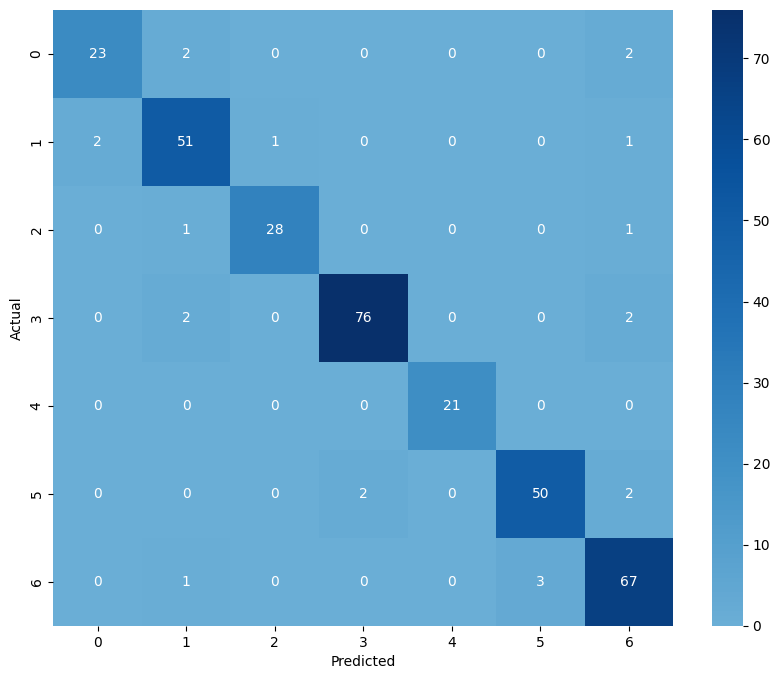

In [50]:
plt.figure(figsize=(10, 8))

sns.heatmap(matrix, annot=True, cmap="Blues", center=0, cbar=True)

plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

In [51]:
joblib.dump(forest, '../data/model.pkl')

['../data/model.pkl']